In [42]:
# Importing the cv2 module
import cv2
import os
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
from keras.utils import np_utils

from tensorflow import keras
from tensorflow.keras import layers

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

from keras.layers import Activation, Dense
from keras.models import Sequential 


In [43]:
# download the data into two instances, training data and testing data

train_path = 'C:/Users/Kirsten Korsrud/Documents/diabetes data/chest_xray/train'
test_path = 'C:/Users/Kirsten Korsrud/Documents/diabetes data/chest_xray/test'

# create lists to store the data in once split into the images (X) and classification (y)
x_test = []
X_train = []
y_train = []
y_test = []

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)
    
        img_arr=cv2.resize(img_arr,(200,200))
        
        # store the image data into X_train list
        X_train.append(img_arr)
        
        # If the image corresponds to a 'normal' lung classification, store 0 into y_train
        if img == 'NORMAL':
            y_train.append(0)
        else:
         # If the image corresponds to a 'pneumonia' lung classification, store 1 into y_train
            y_train.append(1)
                
        
for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(200,200))

        # store the image data into X_test list
        x_test.append(img_arr)
        
        # If the image corresponds to a 'normal' lung classification, store 0 into y_test
        if img == 'NORMAL':
            y_test.append(0)
        else:
        # If the image corresponds to a 'pneumonia' lung classification, store 1 into y_test
            y_test.append(1)
        
X_train = np.array(X_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("Number of training examples: ", X_train.shape[0],
     "and the image is of the shape (%d)"%(X_train.shape[1]))

Number of training examples:  5216 and the image is of the shape (200)


In [44]:
# convert to smaller float types 
X_train = X_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [45]:
num_classes = 2
input_shape = (200,200,3)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
print(y_train.shape)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(5216, 2)
(624, 2)


In [46]:
# train the model 
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

#model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0         
                                                                 
 dropout_3 (Dropout)         (None, 147456)           

In [47]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
37/37 [==============================] - 73s 2s/step - loss: 0.0186 - accuracy: 0.9872 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
37/37 [==============================] - 71s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
37/37 [==============================] - 72s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 72s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 72s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
37/37 [==============================] - 73s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
37/37 [==============================] - 72s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0
Test accuracy: 1.0


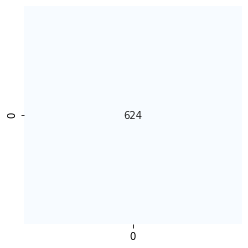

In [51]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
y_pred = model.predict(x_test)
y_pred_c = np.argmax(y_pred, axis=1)
y_test_c = np.argmax(y_test, axis=1)
matrix_confusion = confusion_matrix(y_test_c, y_pred_c)

sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
plt.show()
